In [1]:
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
import pickle
import shutil
import random
import os

In [3]:
# %matplotlib tk
%matplotlib inline

In [4]:
shutil.rmtree('criacao_base', ignore_errors=True)
os.makedirs('criacao_base', exist_ok=True)

In [5]:
tamanho = (500, 500)
ponto_inicial_final = (0, 0), tamanho
raio_size = 25
visual_s = 5
qtd_centroides = 5
paciencia = 10

In [6]:
def posicoes_circulos(x, y, raio_size):
    valor_baixo = (x, y - raio_size)
    valor_cima = (x, y + raio_size)
    valor_esquerda = (x - raio_size, y)
    valor_direita = (x + raio_size, y)
    return valor_baixo, valor_cima, valor_esquerda, valor_direita

In [7]:
def salvar_fig_ax(fig, ax, caminho='criacao_base/'):
    with open(f"{caminho}.pkl", "wb") as f:
        pickle.dump((fig, ax), f)

def abrir_fig_ax(caminho='criacao_base/'):
    with open(f"{caminho}.pkl", "rb") as f:
        fig, ax = pickle.load(f)
    return fig, ax

In [8]:
def exibir_figura(figura, wait=False, pause=False, save=False, show=False):
    if wait:
        plt.waitforbuttonpress()
    if pause:
        plt.pause(0.001)
    if show:
        figura.show()
    if save:
        figura.savefig("criacao_basefigura.png")

def inserir_circulo_img(ax, x, y, raio_size, visual_s, color_centro, color_ext):
    posicoes = posicoes_circulos(x, y, raio_size)
    valores_adicionados = []
    [valores_adicionados.append(ax.scatter(*posicao, color=color_ext, s=visual_s)) for posicao in posicoes]
    valores_adicionados.append(ax.scatter(x, y, color=color_centro, s=visual_s))
    valores_adicionados.append(plt.Circle((x, y), raio_size, color=color_ext, fill=False))
    ax.add_patch(valores_adicionados[-1])
    return valores_adicionados, posicoes

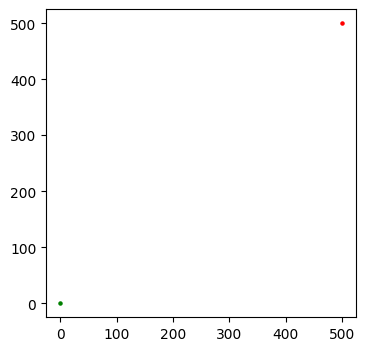

In [9]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
ax.scatter(*ponto_inicial_final[0], color='green', s=visual_s)
ax.scatter(*ponto_inicial_final[1], color='red', s=visual_s);
salvar_fig_ax(fig, ax)

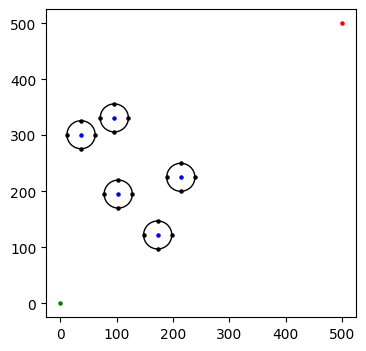

In [10]:
fig, ax = abrir_fig_ax()

centroids = []
posicoes_centroides = []

interacao_atual = 0
paciencia_atual = 0

def distancia_euclidiana(ponto1, ponto2):
    x1, y1 = ponto1
    x2, y2 = ponto2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def verificar_distancia(x1, y1, x2, y2, raio_size) -> bool:
    return distancia_euclidiana((x1, y1), (x2, y2)) < 2 * raio_size

while len(centroids) < qtd_centroides and paciencia_atual < paciencia:

    interacao_atual += 1
    paciencia_atual += 1
    
    x = random.randint(raio_size, tamanho[0] - raio_size)
    y = random.randint(raio_size, tamanho[1] - raio_size)

    if verificar_distancia(x, y, *ponto_inicial_final[0], raio_size):
        # print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto inicial.')
        ...
    elif verificar_distancia(x, y, *ponto_inicial_final[1], raio_size):
        # print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto final.')
        ...
    elif any(verificar_distancia(centroid[0], centroid[1], x, y, raio_size) for centroid in centroids):
        # print(f'Ponto ({x}, {y}) está dentro da área de influência de um dos centroides já criados.')
        ...
    else:
        _, posicao_circulo = inserir_circulo_img(ax, x, y, raio_size, visual_s, 'blue', 'black')
        centroids.append((x, y))
        posicoes_centroides.append(posicao_circulo)
        paciencia_atual = 0
    
salvar_fig_ax(fig, ax)

In [11]:
paciencia_atual

0

In [12]:
def coeficientes_reta(ponto_inicial, ponto_final):
    """
    Calcula os coeficientes da equação da reta que passa pelos pontos iniciais e finais.
    a -> coeficiente angular (inclinação)
    b -> coeficiente linear (intercepto)
    c -> termo constante

    link do exemplo: https://www.todamateria.com.br/equacao-da-reta/
    link da video aula: https://www.youtube.com/watch?v=9dhtGUPgekw

    é possivel transformar a equação da reta na forma y = mx + b, onde m é o coeficiente angular e b é o coeficiente linear.
    
    p1 = (-1, 8)
    p2 = (-5, -1)

    exemplo: 
    a = 9
    b = -4
    c = 41
    """
    
    a = (ponto_inicial[1] - ponto_final[1])
    b = (ponto_final[0] - ponto_inicial[0])
    c = (ponto_final[1] * ponto_inicial[0]) - (ponto_final[0] * ponto_inicial[1])
    return a, b, c

A = (0, 0)
B = (1, 1)
a, b, c = coeficientes_reta(A, B)


print(f"Coeficientes da reta entre {A} e {B}: a = {a}, b = {b}, c = {c}")
print(f"Equação da reta: {a}x + {b}y + {c} = 0")
print(f"Forma reduzida: y = {-a/b}x + {-c/b}")

Coeficientes da reta entre (0, 0) e (1, 1): a = -1, b = 1, c = 0
Equação da reta: -1x + 1y + 0 = 0
Forma reduzida: y = 1.0x + 0.0


In [13]:
def distancia_ponto_reta(novo_ponto, a, b, c):
    """
    Calcula a distância do ponto (novo_ponto) à reta definida pelos coeficientes a, b e c.
    A fórmula é dada por: |ax + by + c| / sqrt(a^2 + b^2)

    Link exemplo: https://www.todamateria.com.br/distancia-entre-dois-pontos/
    Link video aula: https://www.youtube.com/watch?v=FSfwY1fM4EI
    
    Por que não usar a formula: 
    '
    distancia_x = x2 - x1
    distancia_y = y2 - y1
    distancia_euclidiana = (distancia_x ** 2 + distancia_y ** 2) ** 0.5
    '

    Motivo: 
    A fórmula da distância entre dois pontos é uma medida direta da distância euclidiana, 
    que é a mais comum em um espaço cartesiano. No entanto, quando se trata de calcular a distância de um ponto a uma linha,
    a fórmula da linha é mais apropriada, pois leva em consideração a inclinação da linha e a posição do ponto em relação a ela.
    
    Falando de forma informal: 
    Eles medem coisas diferentes. A distância ponto-reta nunca vai ser a mesma que a distância entre dois pontos específicos, porque:
    Uma compara ponto com ponto, A outra compara ponto com linha infinita.

    """
    divisor = ((a**2 + b**2) ** 0.5)
    if divisor == 0:
        raise ZeroDivisionError("Não é uma reta válida, mas sim o plano inteiro ou um conjunto vazio logo não é possível calcular a distância.")
    return abs(a * novo_ponto[0] + b * novo_ponto[1] + c) / divisor

print(f"Distancia usando {distancia_ponto_reta((2, 2), *coeficientes_reta(A, B))}")

Distancia usando 0.0


In [14]:
def projecao_no_segmento(p: tuple[int, int], a: int, b: int, c: int, p1: tuple[int, int], p2: tuple[int, int]) -> tuple[float, float] | None:
    """
    Retorna a projeção ortogonal do ponto p sobre a reta definida por (a, b, c),
    mas somente se a projeção cair dentro do segmento [p1, p2].
    Caso contrário, retorna None.
    
    link aula: https://www.youtube.com/watch?v=fem35PVZjeA
    link solução:  https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line
    

    oque é o denominador?
    O denominador é a soma dos quadrados dos coeficientes a e b da reta.
    Ele é usado para calcular as coordenadas da projeção ortogonal do ponto p na reta.
    Se o denominador for zero, significa que a reta é vertical (ou seja, a = 0 e b = 0), e a projeção não pode ser calculada.
    
    Falando de forma leiga:
    Estamos trabalhando com sombras, onde a reta é a superfície e o ponto p é a fonte de luz. A projeção ortogonal é a "sombra" do ponto p na reta.
    Isso significa que estamos tentando encontrar o ponto na reta que está diretamente abaixo do ponto p, como se estivéssemos projetando a luz do ponto p na reta.
    """
    x, y = p
    denominador = a*a + b*b
    if denominador == 0:
        raise ValueError("Coeficientes inválidos para reta.")

    px = (b * (b*x - a*y) - a*c) / denominador
    py = (a * (-b*x + a*y) - b*c) / denominador

    # Verifica se a projeção está dentro do segmento
    min_x, max_x = min(p1[0], p2[0]), max(p1[0], p2[0])
    min_y, max_y = min(p1[1], p2[1]), max(p1[1], p2[1])

    if abs(px - x) < 1e-9 and abs(py - y) < 1e-9:
        return None

    if min_x <= px <= max_x and min_y <= py <= max_y:
        return px, py
    return None


In [15]:
def reta_entre_dois_pontos(centroids: list[tuple], novo_ponto: tuple[int, int], novo_destino: tuple[int, int]):
  """
  Verifica se é possivel ter uma reta entre dois pontos sem que um centróide a intercepte.

  """
  a, b, c = coeficientes_reta(novo_ponto, novo_destino)
  for centroid in centroids:
    
    try:
      distancia = distancia_ponto_reta(centroid, a, b, c)
    except ZeroDivisionError:
      return False
    
    if distancia < raio_size:
        if (centroid[0] - novo_ponto[0]) * (novo_destino[1] - novo_ponto[1]) == (centroid[1] - novo_ponto[1]) * (novo_destino[0] - novo_ponto[0]):
            # print("Centróide está na reta")
            return False

        if projecao_no_segmento(centroid, a, b, c, novo_ponto, novo_destino):
            # print("Centróide está na projeção da reta")
            return False

  return True

In [16]:
retas = []

todos_pontos = [ponto_inicial_final[0]]
for x in range(len(posicoes_centroides)):
    for y in range(len(posicoes_centroides[x])):
        todos_pontos.append(posicoes_centroides[x][y])
todos_pontos.append(ponto_inicial_final[1])

for i in range(len(todos_pontos)):
    for j in range(i+1, len(todos_pontos)):
        if reta_entre_dois_pontos(centroids, todos_pontos[i], todos_pontos[j]):
            retas.append((todos_pontos[i], todos_pontos[j]))

In [17]:
posicoes_centroides

[((173, 97), (173, 147), (148, 122), (198, 122)),
 ((96, 306), (96, 356), (71, 331), (121, 331)),
 ((37, 276), (37, 326), (12, 301), (62, 301)),
 ((214, 200), (214, 250), (189, 225), (239, 225)),
 ((103, 170), (103, 220), (78, 195), (128, 195))]

Total de pontos: 22
Total de retas criadas: 47


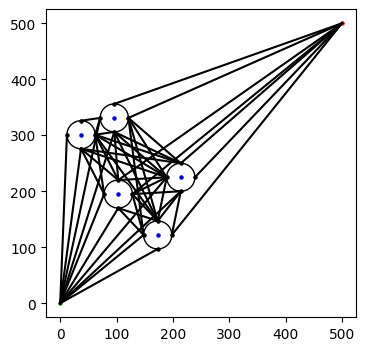

In [18]:
fig, ax = abrir_fig_ax()

retas_desenhadas = []
for reta in retas:
    retas_desenhadas.append(ax.plot(*zip(*reta), color='black'))

print(f"Total de pontos: {len(todos_pontos)}")
print(f"Total de retas criadas: {len(retas)}")

salvar_fig_ax(fig, ax)

In [19]:
for (cima, baixo, esq, dir) in posicoes_centroides:
    retas.append((cima, esq))
    retas.append((cima, dir))
    retas.append((baixo, esq))
    retas.append((baixo, dir))
retas

[((0, 0), (173, 97)),
 ((0, 0), (148, 122)),
 ((0, 0), (96, 306)),
 ((0, 0), (71, 331)),
 ((0, 0), (37, 276)),
 ((0, 0), (12, 301)),
 ((0, 0), (214, 200)),
 ((0, 0), (189, 225)),
 ((0, 0), (103, 170)),
 ((0, 0), (78, 195)),
 ((173, 147), (96, 306)),
 ((173, 147), (121, 331)),
 ((173, 147), (62, 301)),
 ((173, 147), (214, 200)),
 ((173, 147), (189, 225)),
 ((173, 147), (103, 170)),
 ((173, 147), (128, 195)),
 ((148, 122), (121, 331)),
 ((148, 122), (103, 170)),
 ((148, 122), (128, 195)),
 ((198, 122), (214, 200)),
 ((198, 122), (500, 500)),
 ((96, 306), (62, 301)),
 ((96, 306), (214, 250)),
 ((96, 306), (189, 225)),
 ((96, 306), (103, 220)),
 ((96, 356), (500, 500)),
 ((71, 331), (37, 326)),
 ((71, 331), (62, 301)),
 ((121, 331), (214, 250)),
 ((121, 331), (189, 225)),
 ((121, 331), (500, 500)),
 ((37, 276), (214, 250)),
 ((37, 276), (189, 225)),
 ((37, 276), (103, 220)),
 ((37, 276), (78, 195)),
 ((62, 301), (214, 250)),
 ((62, 301), (189, 225)),
 ((62, 301), (103, 220)),
 ((62, 301), 

In [20]:
pontos_unicos = {}
for reta in retas:
  pontos_unicos.setdefault(reta[0], set()).add(reta[1])
  
for key, value in pontos_unicos.items():
  print(f"Reta: {key}, Pontos: {value}")

Reta: (0, 0), Pontos: {(173, 97), (71, 331), (103, 170), (189, 225), (37, 276), (96, 306), (214, 200), (12, 301), (148, 122), (78, 195)}
Reta: (173, 147), Pontos: {(121, 331), (189, 225), (96, 306), (198, 122), (148, 122), (214, 200), (128, 195), (103, 170), (62, 301)}
Reta: (148, 122), Pontos: {(121, 331), (128, 195), (103, 170)}
Reta: (198, 122), Pontos: {(214, 200), (500, 500)}
Reta: (96, 306), Pontos: {(103, 220), (71, 331), (121, 331), (189, 225), (62, 301), (214, 250)}
Reta: (96, 356), Pontos: {(71, 331), (121, 331), (500, 500)}
Reta: (71, 331), Pontos: {(62, 301), (37, 326)}
Reta: (121, 331), Pontos: {(500, 500), (189, 225), (214, 250)}
Reta: (37, 276), Pontos: {(103, 220), (62, 301), (189, 225), (12, 301), (78, 195), (214, 250)}
Reta: (62, 301), Pontos: {(78, 195), (189, 225), (103, 220), (214, 250)}
Reta: (214, 200), Pontos: {(189, 225), (128, 195), (239, 225)}
Reta: (214, 250), Pontos: {(189, 225), (239, 225), (500, 500)}
Reta: (189, 225), Pontos: {(128, 195), (103, 220)}
Ret

In [ ]:
ponto_inicial = ponto_inicial_final[0]
ponto_final = ponto_inicial_final[1]
possibilidade_atual = pontos_unicos[ponto_inicial]

def encontrar_possibilidades(ponto_atual, ponto_final, pilha=[]):
    pilha.append(ponto_atual)
    if ponto_atual == ponto_final:
        return True
    for prox_ponto in pontos_unicos.get(ponto_atual, []):
        if encontrar_possibilidades(prox_ponto, ponto_final, pilha):
            return True
    pilha.pop()
    return False

pilha = []
encontrar_possibilidades(ponto_inicial, ponto_final, pilha)

True

In [22]:
def ponto_mesmo_centroid(ponto1, ponto2, centroids, raio_size):
    """
    Verifica se ambos os pontos pertencem ao mesmo centróide.
    """
    centroid_ponto1 = None
    centroid_ponto2 = None
    
    for i, centroid in enumerate(centroids):
        if distancia_euclidiana(ponto1, centroid) <= raio_size:
            centroid_ponto1 = i
            break
    
    for i, centroid in enumerate(centroids):
        if distancia_euclidiana(ponto2, centroid) <= raio_size:
            centroid_ponto2 = i
            break
    
    mesmo = centroid_ponto1 is not None and centroid_ponto1 == centroid_ponto2
    if not mesmo:
        return False, None, None
    return mesmo, centroids[centroid_ponto1], centroids[centroid_ponto2]

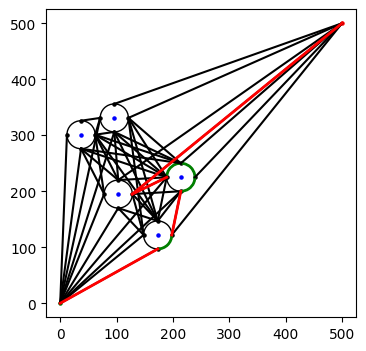

In [25]:
fig, ax = abrir_fig_ax()
for i in range(len(pilha) - 1):
    ponto1 = pilha[i]
    ponto2 = pilha[i + 1]

    mesmo_centro, centroid, _ = ponto_mesmo_centroid(ponto1, ponto2, centroids, raio_size)
    if mesmo_centro:
        angulo1 = np.degrees(np.arctan2(ponto1[1] - centroid[1], ponto1[0] - centroid[0]))
        angulo2 = np.degrees(np.arctan2(ponto2[1] - centroid[1], ponto2[0] - centroid[0]))
        arco = Arc(centroid, width=2*raio_size, height=2*raio_size, theta1=angulo1, theta2=angulo2, color="green", linewidth=2)
        ax.add_patch(arco)
    else:
        ax.plot([ponto1[0], ponto2[0]], [ponto1[1], ponto2[1]], color='red', linewidth=2)